In [1]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML

In [24]:
class Person(Circle):
    def __init__(self, ax, xy=(0.5,0.5), xyrate=(0.2,0.1), infected=False):
        Circle.__init__(self, xy, radius=0.05)
        self.xyrate = list(xyrate) # mutable, so we can update it
        self.set_infected(infected)
        ax.add_artist(self) # draw ourself on the canvas
        
    def set_infected(self, infected):
        self.infected = infected
        if self.infected:
            self.set_color("red")
        else:
            self.set_color("0.5")
            
    def move(self, seconds):
        new_x = self.center[0] + self.xyrate[0] * seconds
        new_y = self.center[1] + self.xyrate[1] * seconds
        self.set_center((new_x, new_y))
        
        # "bounce" off walls
        if new_x > ax.get_xlim()[1]:
            # too far right, move left
            self.xyrate[0] = -abs(self.xyrate[0])
        elif new_x < ax.get_xlim()[0]:
            # too far left, move right
            self.xyrate[0] = abs(self.xyrate[0])
        if new_y > ax.get_ylim()[1]:
            # too far up, move down
            self.xyrate[1] = -abs(self.xyrate[1])
        elif new_y < ax.get_ylim()[0]:
            # too far down, move up
            self.xyrate[1] = abs(self.xyrate[1])
            
    def in_contact(self, other):
        xdiff = self.center[0] - other.center[0]
        ydiff = self.center[1] - other.center[1]
        dist = (xdiff**2 + ydiff**2) ** 0.5
        return dist < self.radius + other.radius

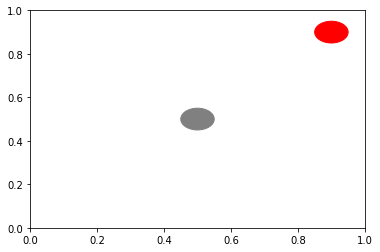

In [16]:
fig,ax = plt.subplots()
p1 = Person(ax)
p2 = Person(ax, xy=(0.9,0.9), infected=True)

In [29]:
fig, ax = plt.subplots(figsize=(6,6))

p1 = Person(ax)
p2 = Person(ax, xy=(0.2, 0.3), xyrate=(-0.3, 0), infected=True)
p3 = Person(ax, xy=(0.9, 0.9), xyrate=(0.05, -0.03), infected=True)
p4 = Person(ax, xy=(0.7, 0.1), xyrate=(0, 0))
people = [p1, p2, p3, p4]

fps = 30
seconds = 20
frames = fps * seconds

def draw_frame(fnum):
    perc = fnum / frames
    for p in people:
        p.move(seconds=1/fps)
    
        if p.infected:
            for other in people:
                if p.in_contact(other):
                    other.set_infected(True)

anim = FuncAnimation(fig, draw_frame, frames=frames, interval=1000/fps)
html = anim.to_html5_video()
plt.close(fig)
HTML(html)

# Part 2

In [34]:
from collections import defaultdict

def count_by_range_v1(values, ranges):
    counts = defaultdict(int)
    for v in values:
        for r in ranges:
            if r[0] <= v <= r[1]: # line A
                counts[r] += 1
    return counts

def count_by_range_v2(values, ranges):
    values.sort() # eliminate this?
    ranges.sort() # eliminate this?

    r_idx = 0
    r = ranges[r_idx]

    counts = defaultdict(int)
    for v in values:
        while v > r[1]:
            r_idx += 1 # line C
            if r_idx == len(ranges):
                return counts # all remaining values past last range
            r = ranges[r_idx]
    
        # we know that v <= r[1] since we stopped looping above
        if r[0] <= v: # line B
            counts[r] += 1
    return counts

In [32]:
count_by_range_v1(values=[1, 11, 30, 35, 90, 85, 2], ranges=[(1, 10), (11, 50), (51, 100)])

defaultdict(int, {(1, 10): 2, (11, 50): 3, (51, 100): 2})

In [35]:
count_by_range_v2(values=[1, 11, 30, 35, 90, 85, 2], ranges=[(1, 10), (11, 50), (51, 100)])

defaultdict(int, {(1, 10): 2, (11, 50): 3, (51, 100): 2})